<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [2]:
student_number = '400109638'
first_name = 'Mana'
last_name = 'Abbaszadeh'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [1]:
# TODO: Write your code here
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [2]:
# TODO: Write your code here
data = pd.read_csv('./Data/satimage.csv')

In [3]:
print(data.head())

      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        27        28        29        30        31  \
0 -2.2500  0.077672  ... -0.600000 -0.138462 -0.188119 -0.431579 -0.546875   
1 -2.2500  0.077672  ... -0.600000 -0.015385 -0.049505 -0.431579 -0.609375   
2  3.4375  6.368924  ... -0.233333  0.200000  0.207921 -0.010526 -0.312500   
3 -3.8750 -2.368924  ... -0.383333 -0.138462 -0.049505 -0.347368 -0.484375   
4 -0.6250 -1.320388  ... -0.183333  0.230769  0.267327 -0.031579 -0.281250   

        32        33        34        35  label  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6435 non-null   float64
 1   1       6435 non-null   float64
 2   2       6435 non-null   float64
 3   3       6435 non-null   float64
 4   4       6435 non-null   float64
 5   5       6435 non-null   float64
 6   6       6435 non-null   float64
 7   7       6435 non-null   float64
 8   8       6435 non-null   float64
 9   9       6435 non-null   float64
 10  10      6435 non-null   float64
 11  11      6435 non-null   float64
 12  12      6435 non-null   float64
 13  13      6435 non-null   float64
 14  14      6435 non-null   float64
 15  15      6435 non-null   float64
 16  16      6435 non-null   float64
 17  17      6435 non-null   float64
 18  18      6435 non-null   float64
 19  19      6435 non-null   float64
 20  20      6435 non-null   float64
 21  21      6435 non-null   float64
 22  

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [5]:
# TODO: Write your code here
new_data = data[data['label'].isin([4, 6])]

new_data['label'] = new_data['label'].apply(lambda x: 1 if x == 4 else -1)

data = new_data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2134 non-null   float64
 1   1       2134 non-null   float64
 2   2       2134 non-null   float64
 3   3       2134 non-null   float64
 4   4       2134 non-null   float64
 5   5       2134 non-null   float64
 6   6       2134 non-null   float64
 7   7       2134 non-null   float64
 8   8       2134 non-null   float64
 9   9       2134 non-null   float64
 10  10      2134 non-null   float64
 11  11      2134 non-null   float64
 12  12      2134 non-null   float64
 13  13      2134 non-null   float64
 14  14      2134 non-null   float64
 15  15      2134 non-null   float64
 16  16      2134 non-null   float64
 17  17      2134 non-null   float64
 18  18      2134 non-null   float64
 19  19      2134 non-null   float64
 20  20      2134 non-null   float64
 21  21      2134 non-null   float64
 22  

C:\Users\abbas\AppData\Local\Temp\ipykernel_15652\428839616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['label'] = new_data['label'].apply(lambda x: 1 if x == 4 else -1)


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [28]:
# TODO: Write your code here
X = data.drop('label', axis=1)
y = data['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`
$$
\begin{aligned}
\text { Maximize } & \left(
    \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N} \alpha_n \alpha_m y^{(n)} y^{(m)} x^{(n)^T} x^{(m)} 
                    \right) \\
\text { Subject to } & \sum_{n=1}^{N} \alpha_n y^{(n)} = 0 \\ 
& 0 \leq \alpha_n \leq C and \quad n=1,2, \ldots, N
\end{aligned}
$$
`

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [29]:
from cvxopt import matrix, solvers

def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    num_samples = len(X)

    r1 = matrix(-np.ones(num_samples))
    
    r2 = np.dot(X, X.T)
    P = matrix(np.outer(y, y) * r2)

    r = matrix(0.0)
    A = matrix(y, (1, num_samples), 'd')

    h = matrix(np.hstack((np.zeros(num_samples), np.ones(num_samples) * C)))
    G = matrix(np.vstack((-np.eye(num_samples), np.eye(num_samples))))
    
    qp_result = solvers.qp(P, r1, G, h, A, r)
    alphas = np.array(qp_result['x']).flatten()

    res = alphas > 1e-5

    ind = np.arange(len(alphas))[res]
    support_vectors = X[res]
    support_vector_labels = y[res]
    support_vector_alphas = alphas[res]
    
    print(res)
    # print(support_vectors)

    return support_vectors, support_vector_labels, support_vector_alphas

In [30]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train, y_train, C)

     pcost       dcost       gap    pres   dres
 0: -6.2727e+02 -3.5044e+03  2e+04  3e+00  7e-12
 1: -4.2928e+02 -2.3929e+03  3e+03  4e-01  3e-12
 2: -4.0837e+02 -7.8172e+02  4e+02  2e-02  2e-12
 3: -4.5461e+02 -6.1119e+02  2e+02  9e-03  2e-12
 4: -4.7861e+02 -5.5775e+02  8e+01  4e-03  2e-12
 5: -4.9109e+02 -5.3295e+02  4e+01  2e-03  2e-12
 6: -4.9926e+02 -5.1853e+02  2e+01  7e-04  2e-12
 7: -5.0399e+02 -5.1066e+02  7e+00  2e-04  2e-12
 8: -5.0578e+02 -5.0786e+02  2e+00  6e-05  2e-12
 9: -5.0642e+02 -5.0689e+02  5e-01  1e-05  2e-12
10: -5.0660e+02 -5.0664e+02  4e-02  6e-07  3e-12
11: -5.0662e+02 -5.0662e+02  1e-03  2e-08  3e-12
12: -5.0662e+02 -5.0662e+02  2e-05  3e-10  3e-12
Optimal solution found.
[False False False ...  True False False]


In [32]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    y_pred = np.zeros(len(x_test))

    pred = 0
    for test_idx in range(len(x_test)):
        for alpha, label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors.values):
            val = float(np.dot(x_test[test_idx], sv)) * float(label) * float(alpha)
            pred += val

        y_pred[test_idx] = np.sign(pred)
        pred = 0

    return y_pred 

In [33]:
y_pred = predict_labels(np.array(X_test), support_vectors, support_vector_labels, support_vector_alphas)
print(f'y_predictions:\n{y_pred}')

y_predictions:
[ 1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1.
  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.
 -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1.  1. -1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.
  1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.
 -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.
  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1.  1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.
 -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

In [35]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


a, ba, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.6891385767790262
Balanced Accuracy:  0.7779806754720326
Confusion Matrix:
 [[227 162]
 [  4 141]]


<Axes: >

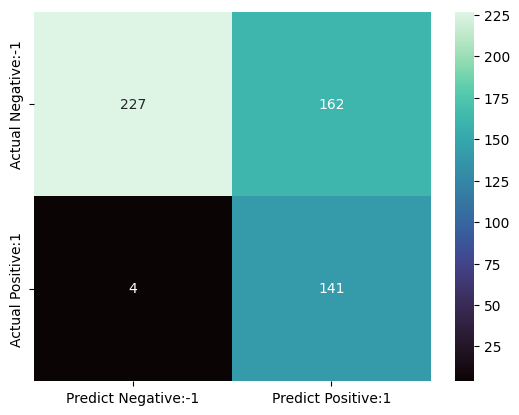

In [36]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [74]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here
    sub = np.subtract(x1, x2)
    norm = np.dot(sub, sub)
    gamma *= -1
    output = np.exp(norm * gamma)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    num_samples = len(X)
    r1 = np.zeros((num_samples, num_samples))

    for s1_idx in range(num_samples):
        for s2_idx in range(num_samples):
            r1[s1_idx, s2_idx] = rbf(X[s1_idx], X[s2_idx], gamma)
    
    r2 = matrix(-np.ones(num_samples))

    P = matrix(np.outer(y, y) * r1)

    r = matrix(0.0)
    A = matrix(y, (1, num_samples), 'd')

    h = matrix(np.hstack((np.zeros(num_samples), np.ones(num_samples) * C)))
    G = matrix(np.vstack((-np.eye(num_samples), np.eye(num_samples))))

    qp_result = solvers.qp(P, r2, G, h, A, r)
    alphas = np.array(qp_result['x']).flatten()
    
    res = alphas > 1e-5
    support_vectors = X[res]
    support_vector_labels = y[res]
    support_vector_alphas = alphas[res]

    return support_vectors, support_vector_labels, support_vector_alphas

predict_labels_rbf is a function like the predict_labels function that we used in the previous part:

In [75]:
def predict_labels_rbf(gamma, x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    y_pred = np.zeros(len(x_test))

    pred = 0
    for test_idx in range(len(x_test)):
        for alpha, label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            val = float(rbf(x_test[test_idx], sv, gamma)) * float(label) * float(alpha)
            pred += val

        y_pred[test_idx] = np.sign(pred)
        pred = 0

    return y_pred

In [79]:
gammas = [0.001, 0.01, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None

# TODO: Write your code here
best_accuracy = -1
for gamma in gammas:
    print(f'\n-Current gamma:  {gamma}\n')
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_val_scaled, y_val, C, gamma)
    y_pred = predict_labels_rbf(gamma, X_val_scaled, support_vectors, support_vector_labels, support_vector_alphas)
    
    a, ba, cm = evaluate(y_val, y_pred)

    if best_accuracy < ba:
        best_accuracy = ba
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas

print(f'\n-Best gamma is: {best_gamma}\n')


-Current gamma:  0.001

     pcost       dcost       gap    pres   dres
 0: -1.6283e+02 -7.7158e+02  3e+03  3e+00  5e-15
 1: -1.1164e+02 -4.9479e+02  4e+02  5e-02  3e-15
 2: -1.2983e+02 -1.9195e+02  6e+01  8e-03  2e-15
 3: -1.4515e+02 -1.6733e+02  2e+01  2e-03  2e-15
 4: -1.5114e+02 -1.5835e+02  7e+00  5e-04  2e-15
 5: -1.5356e+02 -1.5491e+02  1e+00  6e-05  3e-15
 6: -1.5410e+02 -1.5422e+02  1e-01  2e-07  3e-15
 7: -1.5415e+02 -1.5417e+02  1e-02  2e-08  3e-15
 8: -1.5416e+02 -1.5416e+02  1e-04  3e-10  3e-15
Optimal solution found.
Accuracy:  0.790625
Balanced Accuracy:  0.8146198830409357
Confusion Matrix:
 [[170  55]
 [ 12  83]]

-Current gamma:  0.01

     pcost       dcost       gap    pres   dres
 0: -1.1835e+02 -7.6129e+02  4e+03  3e+00  3e-15
 1: -8.6071e+01 -4.7540e+02  5e+02  1e-01  2e-15
 2: -9.4270e+01 -1.6023e+02  7e+01  2e-02  1e-15
 3: -1.0723e+02 -1.2882e+02  2e+01  4e-03  2e-15
 4: -1.1191e+02 -1.1966e+02  8e+00  1e-03  1e-15
 5: -1.1366e+02 -1.1658e+02  3e+00  3e-04  1

In [80]:
# y_pred = predict_labels_rbf(best_gamma, np.array(X_test), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
y_pred = predict_labels_rbf(best_gamma, np.array(X_test_scaled), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test, y_pred)

Accuracy:  0.846441947565543
Balanced Accuracy:  0.8447853486289683
Confusion Matrix:
 [[320  57]
 [ 25 132]]


<Axes: >

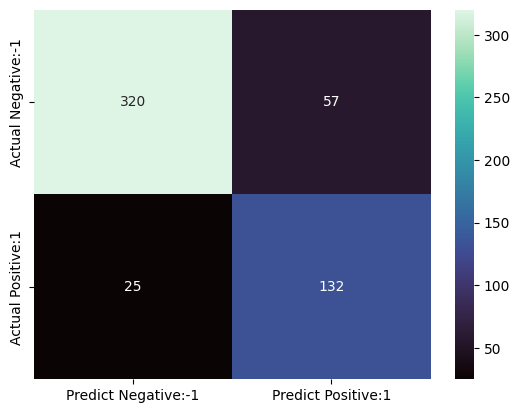

In [81]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Load the data:

In [41]:
data = pd.read_csv('./Data/satimage.csv')
X = data.drop('label', axis=1)
y = data['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [46]:
# TODO: Write your code here
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
cv = 5

svm_model = SVC(kernel='rbf')
param_grid = {'C':Cs, 'gamma': gammas}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=cv,  scoring='balanced_accuracy')
grid_search.fit(X_val_scaled, y_val)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_model = grid_search.best_estimator_

print(f'Best C is {best_C}')
print(f'Best gamma is {best_gamma}')

y_pred = best_model.predict(X_test_scaled)
a, ba, confusion_mat = evaluate(y_test, y_pred)

Best C is 10
Best gamma is 0.1
Accuracy:  0.8819142324425109
Balanced Accuracy:  0.8689104585701625
Confusion Matrix:
 [[345   1   5   1   3   0]
 [  0 182   0   1   3   3]
 [  3   2 305  25   1   6]
 [  1   1  23 106   4  20]
 [ 10   5   0   1 160   9]
 [  0   1   9  44   8 321]]


Confusion Matrix:

<Axes: >

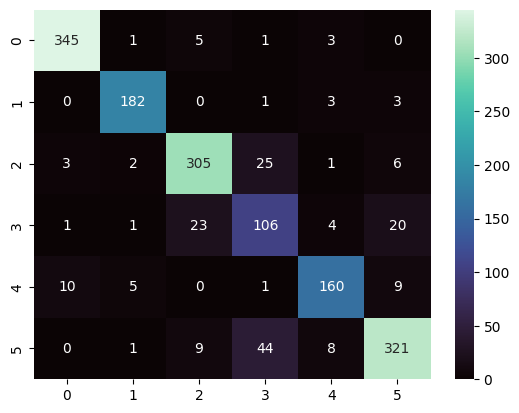

In [47]:
cm_matrix = pd.DataFrame(data=confusion_mat)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

Implement Multiclass SVM from scratch without using ready functions (optional).

In [48]:
# TODO: Write your code here
classifiers = list()
num_classes = 6

for c_label in range(num_classes):
    binary_labels = np.where(c_label==y_train, 1, -1)
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_scaled, binary_labels, best_C, best_gamma)
    classifiers.append((support_vectors, support_vector_labels, support_vector_alphas))


n_classes = len(classifiers)
# print(n_classes)
n_samples = len(X_test_scaled)
predictions = np.zeros((n_samples, n_classes))
pred = 0

for i, (support_vectors, support_vector_labels, support_vector_alphas) in enumerate(classifiers):
    for j in range(n_samples):
        for alpha, sv_label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            val = rbf(X_test_scaled[j], sv, best_gamma) * sv_label * alpha
            pred += val

        predictions[j, i] = pred
        pred = 0

y_pred = np.argmax(predictions, axis=1)
a, ba, confusion_mat = evaluate(y_test, y_pred)

     pcost       dcost       gap    pres   dres
 0: -6.9820e-14 -3.8610e+04  8e+04  1e-01  8e-15
 1: -4.4167e-16 -7.0470e+02  1e+03  1e-03  2e-15
 2:  1.8799e-17 -7.0477e+00  1e+01  1e-05  2e-15
 3:  1.8944e-19 -7.0477e-02  1e-01  1e-07  2e-15
 4:  1.8947e-21 -7.0477e-04  1e-03  1e-09  2e-15
 5:  1.8947e-23 -7.0477e-06  1e-05  1e-11  2e-15
 6:  1.8947e-25 -7.0477e-08  1e-07  1e-13  2e-15
 7:  1.8947e-27 -7.0477e-10  1e-09  2e-15  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3434e+03 -1.0449e+05  2e+05  3e-01  1e-14
 1:  1.3725e+03 -1.3580e+04  2e+04  2e-02  8e-15
 2:  5.0412e+02 -4.4235e+03  6e+03  5e-03  8e-15
 3:  7.6926e+01 -1.7462e+03  2e+03  1e-03  6e-15
 4: -9.0500e+01 -9.4622e+02  9e+02  5e-04  5e-15
 5: -1.6939e+02 -5.8260e+02  4e+02  2e-04  5e-15
 6: -2.0848e+02 -4.1907e+02  2e+02  1e-14  6e-15
 7: -2.3130e+02 -3.3288e+02  1e+02  2e-14  5e-15
 8: -2.4420e+02 -2.9045e+02  5e+01  2e-14  6e-15
 9: -2.5248e+02 -2.6703e+02  1e+01  4e-16  5e-1

c:\Users\abbas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2446: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Confusion Matrix:

<Axes: >

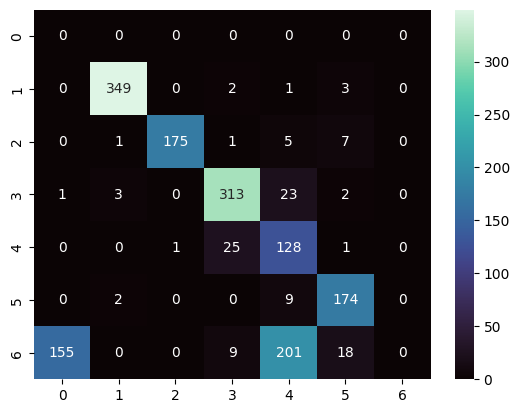

In [49]:
cm_matrix = pd.DataFrame(data=confusion_mat)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

In [50]:
# TODO: Write your code here

linear_kernel = SVC(kernel='linear')
linear_kernel.fit(X_train_scaled, y_train)
y_pred_linear = linear_kernel.predict(X_test_scaled)
a, ba, confusion_mat_linear = evaluate(y_test, y_pred_linear)

Accuracy:  0.872591671845867
Balanced Accuracy:  0.8344319384555986
Confusion Matrix:
 [[351   0   1   0   3   0]
 [  1 173   1   0  14   0]
 [  3   0 322  15   1   1]
 [  4   1  37  72   3  38]
 [  5   7   0   2 153  18]
 [  0   0  11  27  12 333]]


Confusion Matrix:

Text(0.5, 1.0, 'Linear Kernel')

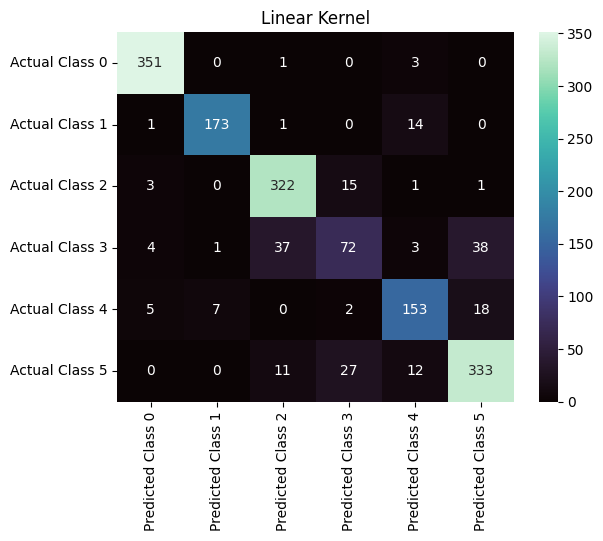

In [52]:
cm_matrix_linear = pd.DataFrame(data=confusion_mat_linear, columns=['Predicted Class ' + str(i) for i in range(num_classes)],
                                index=['Actual Class ' + str(i) for i in range(num_classes)])
sns.heatmap(cm_matrix_linear, annot=True, fmt='d', cmap='mako')
plt.title("Linear Kernel")

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

In [53]:
# TODO: Write your code here
rbf_kernel = SVC(kernel='rbf')
rbf_kernel.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_kernel.predict(X_test_scaled)
a, ba, confusion_mat_rbf = evaluate(y_test, y_pred_rbf)

Accuracy:  0.8912367930391547
Balanced Accuracy:  0.8678617390048845
Confusion Matrix:
 [[351   1   2   0   1   0]
 [  0 181   0   1   6   1]
 [  3   1 325   7   1   5]
 [  3   1  37  90   2  22]
 [  3   2   1   1 164  14]
 [  0   1  11  41   7 323]]


Confusion Matrix:

Text(0.5, 1.0, 'Gaussian RBF Kernel')

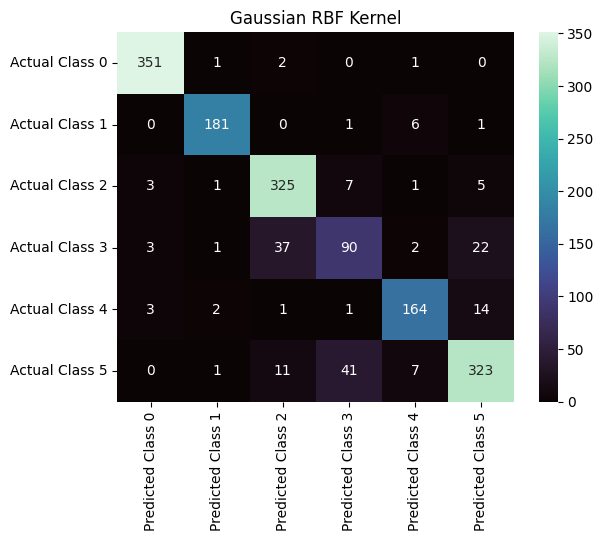

In [54]:
cm_matrix_rbf = pd.DataFrame(data=confusion_mat_rbf, columns=['Predicted Class ' + str(i) for i in range(num_classes)],
                                index=['Actual Class ' + str(i) for i in range(num_classes)])
sns.heatmap(cm_matrix_rbf, annot=True, fmt='d', cmap='mako')
plt.title("Gaussian RBF Kernel")

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

In [55]:
# TODO: Write your code here
poly_kernel = SVC(kernel='poly')
poly_kernel.fit(X_train_scaled, y_train)
y_pred_poly = poly_kernel.predict(X_test_scaled)
a, ba, confusion_mat_poly = evaluate(y_test, y_pred_poly)

Accuracy:  0.8477315102548166
Balanced Accuracy:  0.8191602351764184
Confusion Matrix:
 [[353   0   1   0   1   0]
 [  3 175   1   3   5   2]
 [  5   0 310  21   0   6]
 [ 11   0  30  93   0  21]
 [ 25   2   0  10 128  20]
 [  2   1   4  68   3 305]]


Confusion Matrix:

Text(0.5, 1.0, 'Polynomial Kernel')

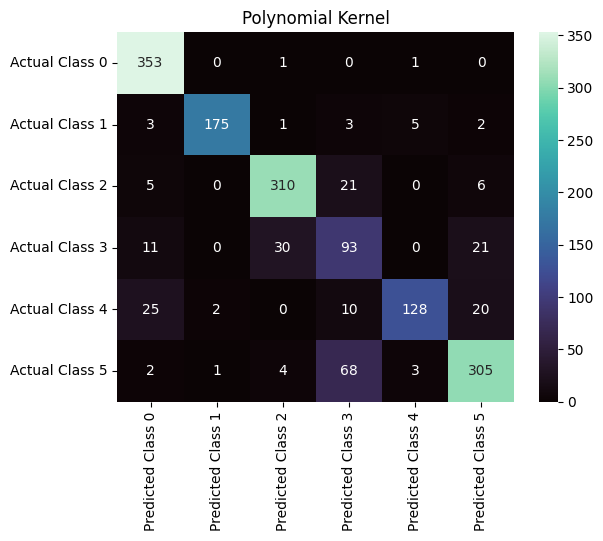

In [56]:
cm_matrix_poly = pd.DataFrame(data=confusion_mat_poly, columns=['Predicted Class ' + str(i) for i in range(num_classes)],
                                index=['Actual Class ' + str(i) for i in range(num_classes)])
sns.heatmap(cm_matrix_poly, annot=True, fmt='d', cmap='mako')
plt.title("Polynomial Kernel")

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

In [57]:
# TODO: Write your code here
sigmoid_kernel = SVC(kernel='sigmoid')
sigmoid_kernel.fit(X_train_scaled, y_train)
y_pred_sigmoid = sigmoid_kernel.predict(X_test_scaled)
_, _, confusion_mat_sigmoid = evaluate(y_test, y_pred_sigmoid)

Accuracy:  0.723430702299565
Balanced Accuracy:  0.678944902894234
Confusion Matrix:
 [[293   5  16   0  41   0]
 [ 25 156   0   2   6   0]
 [  2   0 306  30   3   1]
 [  4   1  39  50  16  45]
 [ 21  28   6  27  96   7]
 [  0   1  11  53  55 263]]


Confusion Matrix:

Text(0.5, 1.0, 'Sigmoid Kernel')

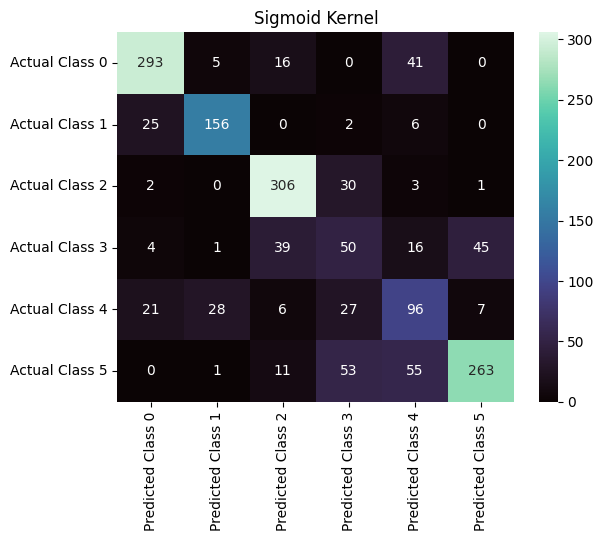

In [58]:
cm_matrix_sigmoid = pd.DataFrame(data=confusion_mat_sigmoid, columns=['Predicted Class ' + str(i) for i in range(num_classes)],
                                index=['Actual Class ' + str(i) for i in range(num_classes)])
sns.heatmap(cm_matrix_sigmoid, annot=True, fmt='d', cmap='mako')
plt.title("Sigmoid Kernel")

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

# `Answer:`<br>
## Linear Kernel:
#### Advantages:
It is suitable for linearly seperable data or in case that the data is nearly linearly seperable (the decision boundary is almost likely linear). It is good when the dataset is very large and it is unlikely to overfit. Computations are simple and efficient in the linear kernel. 

#### Disadvantages:
Linear kernel can't perform efficient when the data and its decision boundary is complex. Also, it isn't efficient to use it for datasets that are not linearly separable.

## Gaussian RBF Kernel:
#### Advantages:
It can model complex dicision boundaries even if the dimension of the space is high. Efficient for modeling the not-linearly separable data. It doesn't need any prior knowledge about the data distribution to model it.

#### Disadvantages:
We should carefully tune the hyperparameters like gamma because this kernel is very sensitive to the choice of hyperparameters. The computation will take a long time specially when the dataset is large or has a lot of features.


## Polynomial Kernel:
#### Advantages:
This kernel can model datasets that are not linearly separable better than the linear kernel, but we should be careful about the risk of overfitting. Also we can use it to model complex decision boundaries. 

#### Disadvantages:
It will overfit if we set the degree to higher numbers and will take a lot of time to train, so it is less efficient than the linear kernel in high-dimensional data. We can conclude that this kernel is sensitive to the choice of hyperparameters like the degree of the polynomial.


## Sigmoid Kernel:
#### Advantages:
This kernel can model complex patterns. It is suitable for not-linearly separable datasets that have non-linear decision boundaries. Good for binary classification and also, neural network architectures.

#### Disadvantages:
It is sensitive to the choice of hyperparameters that it could overfit if the hyperparameters are not carefully tuned. Not as popular to use as other kernels like polynomial and RBF.


## Conclusion:
Every kernel hass its advantages and disadvantages. Choosing the kernel depends on the characteristics of the dataset, model complexity, decision boundaries, etc.